In [ ]:
import gpytorch
import torch
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood, kernel):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = kernel

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x) # p(f)

### Prepare data

In [ ]:
# x = torch.linspace(0., 1., 200)\
seed = 22
# true_nu = .5

x = np.linspace(0., 1., 200)
np.random.seed(seed)
torch.manual_seed(seed)
np.random.shuffle(x)
x = torch.from_numpy(x).float()

kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
gp = ExactGPModel(
    train_x=None,
    train_y=None,
    likelihood=gpytorch.likelihoods.GaussianLikelihood(), # p(y|f)
    kernel=kernel
)


true_noise = 0.1
true_lengthscale = 0.3
true_alpha = .05

gp.covar_module.base_kernel.lengthscale = true_lengthscale
gp.covar_module.base_kernel.alpha = true_alpha
gp.eval()
f_preds = gp(x) 
f = f_preds.rsample().detach()
y = f + true_noise * torch.randn(len(x))
# print(x , y)


/home/virtualx/anaconda3/envs/test_bayesian/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/home/virtualx/anaconda3/envs/test_bayesian/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(


Text(0.5, 1.0, 'Test data')

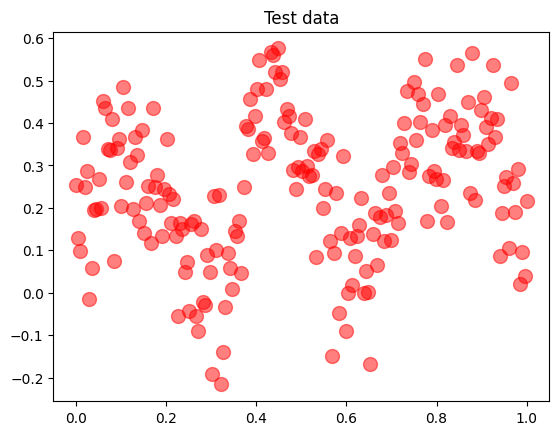

In [ ]:

plt.plot(x, y, "ro", ms=10, alpha=0.5)
plt.title("Test data")

In [ ]:
split_n = 50
eval_x = x[split_n:]
x = x[:split_n]
eval_y = y[split_n:]
eval_f = f[split_n:]
y = y[:split_n]
print(eval_x)

tensor([0.4121, 0.8995, 0.3618, 0.4724, 0.8693, 0.6332, 0.8643, 0.0503, 0.1407,
        0.1206, 0.9899, 0.0101, 0.2714, 0.5930, 0.9095, 0.4874, 0.3719, 0.0050,
        0.1960, 0.1106, 0.9296, 0.7990, 0.3367, 0.0452, 0.8593, 0.4774, 0.6935,
        0.1759, 0.9548, 0.2965, 0.0553, 0.5628, 0.7186, 0.2764, 0.1307, 0.4523,
        0.2111, 0.1859, 0.8744, 0.9347, 0.9246, 0.6030, 0.5377, 0.0804, 0.9196,
        0.3216, 0.7839, 0.3417, 0.0201, 0.6181, 0.5528, 0.1055, 0.0754, 0.2814,
        0.7286, 0.2010, 0.3819, 0.1658, 0.6131, 0.3568, 0.4271, 0.2563, 0.3166,
        0.7035, 0.8291, 0.9849, 0.0905, 0.8794, 0.2462, 0.6281, 0.5075, 0.0000,
        0.4322, 0.3467, 0.5729, 0.9950, 0.2864, 0.3518, 0.6533, 0.5477, 0.0251,
        0.5327, 0.3116, 0.0854, 0.4422, 0.4020, 0.4472, 0.3970, 0.6734, 0.4824,
        0.8241, 0.9799, 0.5779, 0.6583, 0.8894, 0.8945, 0.6884, 0.2663, 0.5427,
        0.7487, 0.7638, 0.3266, 0.9447, 0.2412, 0.3015, 0.2915, 0.4171, 0.6482,
        0.5678, 0.2362, 0.9146, 0.5829, 

In [ ]:
order = np.argsort(eval_x)
eval_x = eval_x[order]
eval_f = eval_f[order]
eval_y = eval_y[order]
print(eval_x)

tensor([0.0000, 0.0050, 0.0101, 0.0201, 0.0251, 0.0352, 0.0402, 0.0452, 0.0503,
        0.0553, 0.0704, 0.0754, 0.0804, 0.0854, 0.0905, 0.0955, 0.1055, 0.1106,
        0.1156, 0.1206, 0.1307, 0.1357, 0.1407, 0.1457, 0.1658, 0.1709, 0.1759,
        0.1859, 0.1910, 0.1960, 0.2010, 0.2111, 0.2211, 0.2261, 0.2362, 0.2412,
        0.2462, 0.2563, 0.2613, 0.2663, 0.2714, 0.2764, 0.2814, 0.2864, 0.2915,
        0.2965, 0.3015, 0.3116, 0.3166, 0.3216, 0.3266, 0.3367, 0.3417, 0.3467,
        0.3518, 0.3568, 0.3618, 0.3719, 0.3819, 0.3970, 0.4020, 0.4070, 0.4121,
        0.4171, 0.4221, 0.4271, 0.4322, 0.4422, 0.4472, 0.4523, 0.4673, 0.4724,
        0.4774, 0.4824, 0.4874, 0.5025, 0.5075, 0.5126, 0.5176, 0.5276, 0.5327,
        0.5377, 0.5427, 0.5477, 0.5528, 0.5578, 0.5628, 0.5678, 0.5729, 0.5779,
        0.5829, 0.5879, 0.5930, 0.6030, 0.6080, 0.6131, 0.6181, 0.6281, 0.6332,
        0.6382, 0.6482, 0.6533, 0.6583, 0.6633, 0.6683, 0.6734, 0.6834, 0.6884,
        0.6935, 0.6985, 0.7035, 0.7085, 

Text(0.5, 1.0, 'Train data')

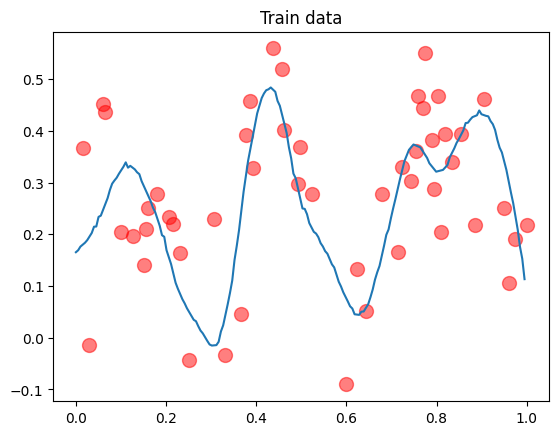

In [ ]:
plt.plot(x, y, "ro", ms=10, alpha=0.5)
plt.plot(eval_x, eval_f)
plt.title("Train data")

In [ ]:
# np.savez("plots/data/gp_rq/data.npz",
#         x_train=x,
#         y_train=y,
#         x_test=eval_x,
#         y_test=eval_y,
#         f_test=eval_f)

In [ ]:
x.shape

torch.Size([50])

### Error vs MLL vs CMLL

In [ ]:
alpha_array = torch.linspace(0.0, 0.3, 300)

In [ ]:
# true_noise = np.sqrt(0.03)
# true_noise = 0.03

true_noise = 0.1
# true_noise = 0.2

tensor(0.0672)


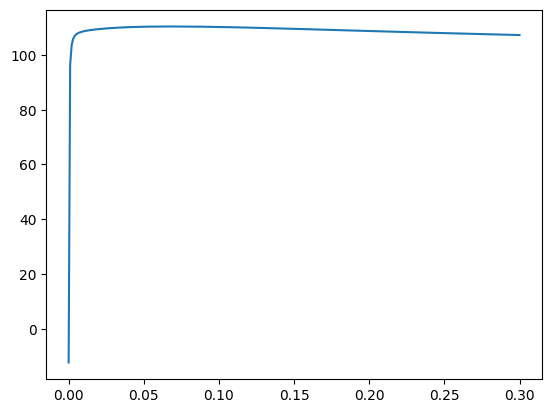

In [ ]:
error_ll = []

for kernel_ll in alpha_array:
    
    kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
    noise = torch.tensor([true_noise**2])

    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    likelihood.noise_covar.noise = noise
    gp = ExactGPModel(
        train_x=x,#[:40],
        train_y=y,#[:40],
        likelihood=likelihood,
        kernel=kernel
    )
    gp.covar_module.base_kernel.lengthscale = true_lengthscale
    gp.covar_module.base_kernel.alpha = kernel_ll
    gp.eval()
    likelihood.eval()
    f_preds = gp(eval_x)
    y_preds = likelihood(f_preds)

    error = y_preds.log_prob(eval_y)
    
    error_ll.append(error.item())

plt.plot(alpha_array, error_ll)

print(alpha_array[np.argmax(error_ll)])

In [ ]:
def get_log_mll(gp, x, y):
    N = len(x)
    covar_matrix = gp.covar_module(x,x).evaluate()
    covar_matrix += gp.likelihood.noise * torch.eye(N)
    log_mll = - 0.5 * (y.T @ torch.inverse(covar_matrix)) @ y 
    log_mll += - 0.5 * torch.logdet(covar_matrix)
    log_mll += - 0.5 * N * np.log(2 * np.pi)

    return log_mll

/tmp/ipykernel_2776756/1063057985.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789115405/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  log_mll = - 0.5 * (y.T @ torch.inverse(covar_matrix)) @ y


tensor(0.0080)


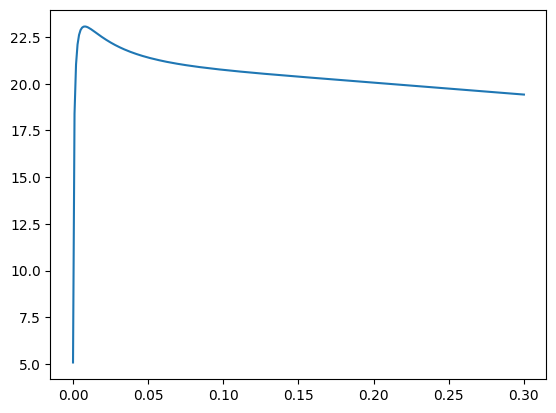

In [ ]:
ml_ll = []

for kernel_ll in alpha_array:
    kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
    noise = torch.tensor([true_noise**2])

    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    likelihood.noise_covar.noise = noise
    gp = ExactGPModel(
        train_x=x,#[:40],
        train_y=y,#[:40],
        likelihood=likelihood,
        kernel=kernel
    )
    gp.covar_module.base_kernel.lengthscale = true_lengthscale
    gp.covar_module.base_kernel.alpha = kernel_ll
    gp.eval()
    likelihood.eval()
    
    ml_ll.append(get_log_mll(gp, x, y).item())

plt.plot(alpha_array, ml_ll)
print(alpha_array[np.argmax(ml_ll)])

tensor(0.0060)


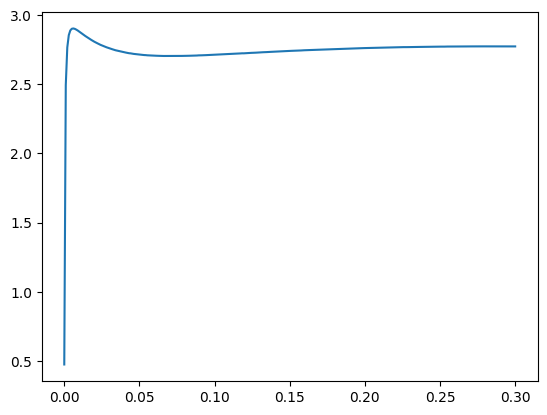

In [ ]:
all_cml_ll = []
all_cml_error = []

m = 45
# m = 20
n_orders = 20

for _ in range(n_orders):
    cml_ll = []
    cml_error = []
    
    order = np.arange(len(x))
    np.random.shuffle(order)
    xm, ym = x[order[:m]], y[order[:m]]
    x_, y_ = x[order[m:]], y[order[m:]]

    for kernel_ll in alpha_array:

        kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
        noise = torch.tensor([true_noise**2])

        likelihood = gpytorch.likelihoods.GaussianLikelihood()
        likelihood.noise_covar.noise = noise
        gp = ExactGPModel(
            train_x=xm,
            train_y=ym,
            likelihood=likelihood,
            kernel=kernel
        )
        gp.covar_module.base_kernel.lengthscale = true_lengthscale
        gp.covar_module.base_kernel.alpha = kernel_ll

        gp.eval()
        likelihood.eval()

        cml_ll.append((get_log_mll(gp, x, y) - get_log_mll(gp, xm, ym)).item())

        
    all_cml_ll.append(cml_ll)

all_cml_ll = np.array(all_cml_ll)
plt.plot(alpha_array, all_cml_ll.mean(0))
print(alpha_array[np.argmax(all_cml_ll.mean(0))])

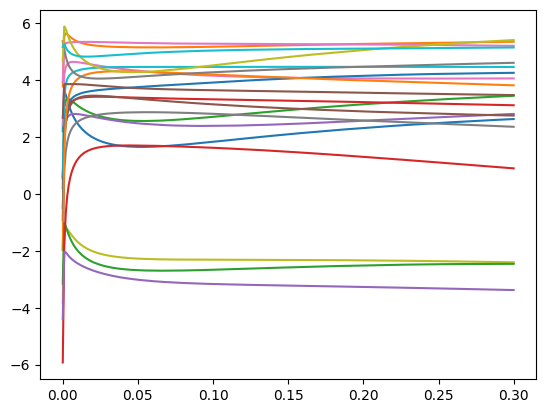

In [ ]:
for i in range(n_orders):
    plt.plot(alpha_array, all_cml_ll[i])
# plt.plot(lengthscale_array, all_cml_ll[1])
# plt.plot(lengthscale_array, all_cml_ll[2])
# plt.plot(lengthscale_array, all_cml_ll[4])
# plt.plot(lengthscale_array, all_cml_ll[5])

In [ ]:
def rescale(lst):
    lst = np.array(lst)
    return (lst - np.min(lst)) / (np.max(lst - np.min(lst)))

Text(0.5, 0, 'RQ kernel, $\\alpha$')

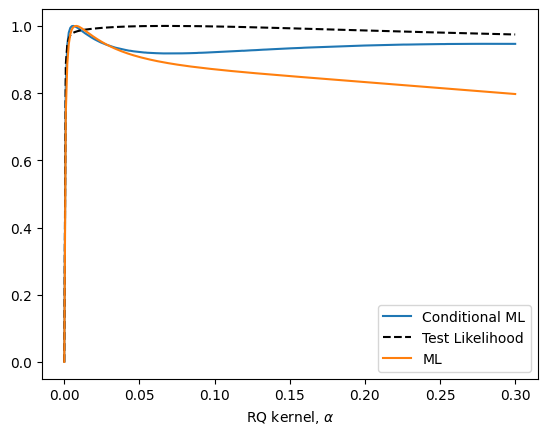

In [ ]:
plt.plot(alpha_array, rescale(all_cml_ll.mean(0)), label="Conditional ML")
plt.plot(alpha_array, rescale(error_ll), "--k", label="Test Likelihood")
plt.plot(alpha_array, rescale(ml_ll), label="ML")
plt.legend()
plt.xlabel(r"RQ kernel, $\alpha$")

In [ ]:
np.savez("plots/data/gp_rq/alpha_optimization_small_noise.npz",
# np.savez("plots/data/gp_rq/alpha_optimization_big_noise.npz",
        alpha=alpha_array,
        cmll=all_cml_ll.mean(0),
        mll=ml_ll,
        test_likelihood=error_ll)

In [ ]:
i = np.argmax(all_cml_ll.mean(0))
alpha_cmll = alpha_array[i]
print("alpha: {} \t cmll: {} \t mll: {}".format(alpha_cmll.item(), all_cml_ll.mean(0)[i], ml_ll[i]))
# all_cml_ll.mean(0)

alpha: 0.006020067259669304 	 cmll: 2.903666687011719 	 mll: 22.997737884521484


In [ ]:
i = np.argmax(ml_ll)
alpha_cmll = alpha_array[i]
print("alpha: {} \t cmll: {} \t mll: {}".format(alpha_cmll.item(), all_cml_ll.mean(0)[i], ml_ll[i]))
# all_cml_ll.mean(0)

alpha: 0.008026756346225739 	 cmll: 2.895155906677246 	 mll: 23.061359405517578


## How does MLL grow with observed data

In [ ]:
import tqdm

In [ ]:
true_noise = 0.2

In [ ]:
kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
noise = torch.tensor([true_noise**2])

likelihood = gpytorch.likelihoods.GaussianLikelihood()
likelihood.noise_covar.noise = noise
gp = ExactGPModel(
    train_x=x,
    train_y=y,
    likelihood=likelihood,
    kernel=kernel
)
gp.covar_module.base_kernel.lengthscale = true_lengthscale
gp.covar_module.base_kernel.alpha = 0.01

In [ ]:
x.shape

torch.Size([50])

In [ ]:
x_combined = torch.cat([x, eval_x])
y_combined = torch.cat([y, eval_y])

In [33]:
alpha_lst = [0.001, 0.01, 0.1, 0.3]
mlls_data = {alpha: np.zeros((len(x_combined),)) for alpha in alpha_lst}
n_orders = 100

for _ in tqdm.tqdm(range(n_orders)):
    cml_ll = []
    cml_error = []
    
    order = np.arange(len(x_combined))
    np.random.shuffle(order)
    x_, y_ = x_combined[order], y_combined[order]
#     print(x_.shape)
    for alpha in alpha_lst:
        gp.covar_module.base_kernel.alpha = alpha
        mlls = np.array([get_log_mll(gp, x_[:i], y_[:i]).item() for i in range(len(x_combined))])
        mlls_data[alpha] += mlls / n_orders


100%|██████████| 100/100 [02:22<00:00,  1.42s/it]


Text(0.5, 1.0, 'Rational quadratic kernel')

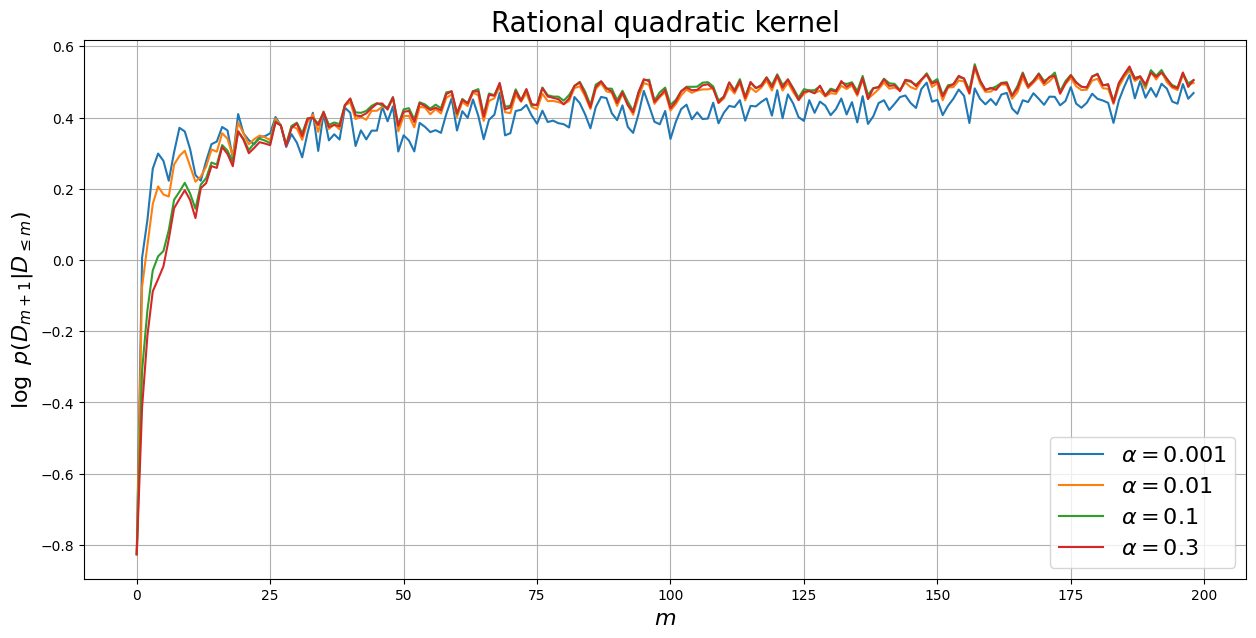

In [34]:
plt.figure(figsize=(15, 7))
plt.grid()

for alpha in alpha_lst:
    plt.plot(mlls_data[alpha][1:] - mlls_data[alpha][:-1], label=r"$\alpha={}$".format(alpha))

# mlls_data[-1]
plt.legend(fontsize=16)
plt.xlabel(r"$m$", fontsize=16)
plt.ylabel(r"$\log ~p(D_{m+1} \vert D_{ \leq m})$", fontsize=16)
plt.title("Rational quadratic kernel", fontsize=20)

In [35]:
mlls_data.keys()

dict_keys([0.001, 0.01, 0.1, 0.3])

In [36]:
np.savez("plots/data/gp_rq/learning_curve.npz",
        mlls_0001=mlls_data[0.001],
        mlls_001=mlls_data[0.01],
        mlls_01=mlls_data[0.1],
        mlls_03=mlls_data[0.3],
        )

Text(0.5, 1.0, 'Rational quadratic kernel')

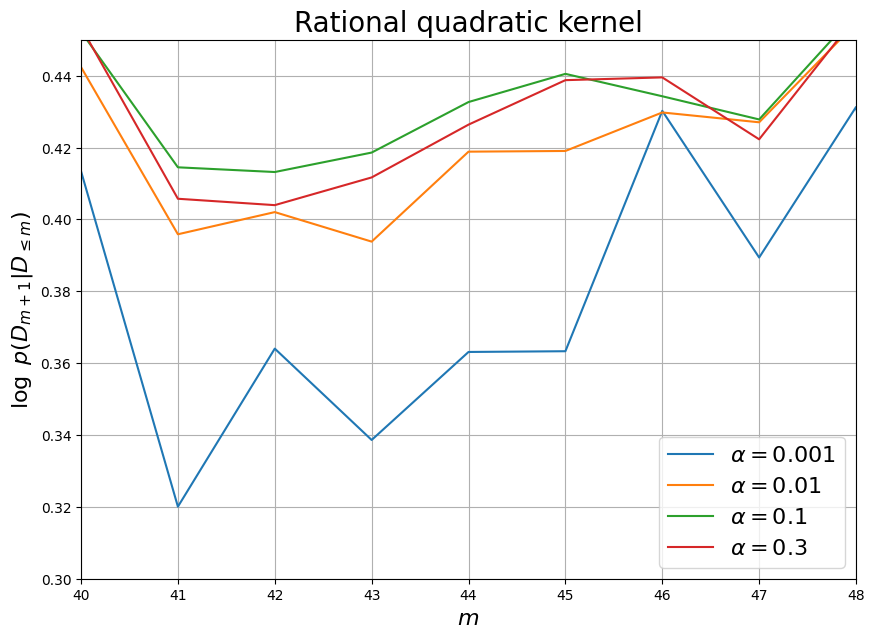

In [37]:
plt.figure(figsize=(10, 7))
plt.grid()

for alpha in alpha_lst:
    plt.plot((mlls_data[alpha][1:] - mlls_data[alpha][:-1]), label=r"$\alpha={}$".format(alpha))

# mlls_data[-1]
plt.xlim(40, 48)
plt.ylim(0.3, 0.45)
plt.legend(fontsize=16)
plt.xlabel(r"$m$", fontsize=16)
plt.ylabel(r"$\log ~p(D_{m+1} \vert D_{ \leq m})$", fontsize=16)
plt.title("Rational quadratic kernel", fontsize=20)

In [38]:
print(type(mlls_data))

<class 'dict'>


In [39]:
print(mlls_data.keys())  # Display the keys in the dictionary
print(mlls_data)         # Print the entire dictionary if needed

dict_keys([0.001, 0.01, 0.1, 0.3])
{0.001: array([ 0.        , -0.82601263, -0.81962296, -0.7071685 , -0.45074835,
       -0.15186772,  0.12653269,  0.34902239,  0.6520334 ,  1.02325441,
        1.38409099,  1.6954306 ,  1.93401608,  2.1566313 ,  2.43436792,
        2.75951553,  3.09215716,  3.46571091,  3.829687  ,  4.11563423,
        4.52544899,  4.88125931,  5.21760761,  5.54243483,  5.8881365 ,
        6.23560534,  6.5912924 ,  6.99267822,  7.36999189,  7.68738577,
        8.04070625,  8.37015057,  8.65845123,  9.01522484,  9.42863583,
        9.73491238, 10.14717007, 10.4830299 , 10.8360133 , 11.17415619,
       11.60180641, 12.01521637, 12.33527119, 12.69930752, 13.03792194,
       13.40102898, 13.76433929, 14.19454098, 14.58392838, 15.0151997 ,
       15.31975906, 15.66991154, 16.00538673, 16.31039539, 16.69534069,
       17.06925453, 17.42827484, 17.79280891, 18.14974426, 18.55993706,
       19.01376793, 19.37735458, 19.79510757, 20.194245  , 20.64487846,
       21.04928261, 2

In [40]:
keys = [0.001, 0.01, 0.1, 0.3]  # Example keys
mlls_values = [mlls_data[key] for key in keys]  # Extract values for each key
mlls_array = np.array(mlls_values)  # Convert to NumPy array

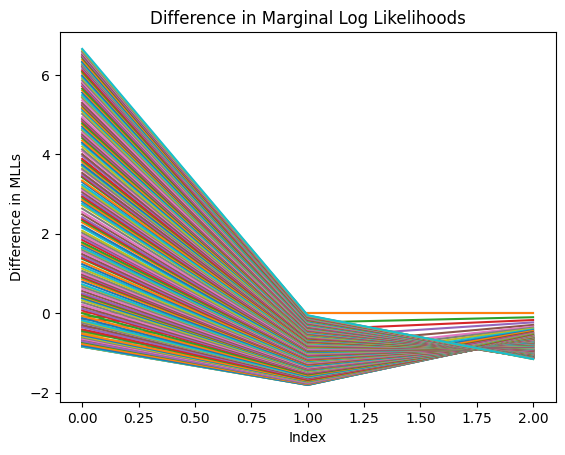

[ 0.00000000e+00 -8.26012633e-01 -1.24027048e+00 -1.45221033e+00
 -1.54019116e+00 -1.59378571e+00 -1.61152896e+00 -1.55314353e+00
 -1.40771621e+00 -1.23662313e+00 -1.04067909e+00 -8.72373223e-01
 -7.54526863e-01 -5.52779508e-01 -3.37019348e-01 -7.32991886e-02
  1.85280046e-01  5.02520561e-01  8.00265617e-01  1.06352844e+00
  1.42470445e+00  1.76215439e+00  2.06193331e+00  2.37648764e+00
  2.70733358e+00  3.03429432e+00  3.35672577e+00  3.74306343e+00
  4.12107353e+00  4.44117310e+00  4.81156218e+00  5.19481911e+00
  5.54217295e+00  5.93940182e+00  6.33844021e+00  6.71715187e+00
  7.13198467e+00  7.50533634e+00  7.88496590e+00  8.26041786e+00
  8.69431149e+00  9.14784184e+00  9.55358353e+00  9.95754898e+00
  1.03692264e+01  1.07955988e+01  1.12343455e+01  1.16738607e+01
  1.20961465e+01  1.25525343e+01  1.29292235e+01  1.33452519e+01
  1.37638629e+01  1.41512725e+01  1.45915375e+01  1.50236217e+01
  1.54446885e+01  1.58724111e+01  1.62923508e+01  1.67582557e+01
  1.72317589e+01  1.76442

In [41]:
plt.plot(mlls_array[1:] - mlls_array[:-1])
plt.xlabel('Index')
plt.ylabel('Difference in MLLs')
plt.title('Difference in Marginal Log Likelihoods')
plt.show()

print(mlls_array[-1])  # Print the last value

In [42]:
plt.plot(mlls_data[1:] - mlls_data[:-1])

mlls_data[-1]

TypeError: unhashable type: 'slice'

In [ ]:
get_log_mll(gp, x[:1], y[:1])

tensor(-0.8377, grad_fn=<AddBackward0>)

In [ ]:
get_log_mll(gp, x[:2], y[:2]) - get_log_mll(gp, x[:1], y[:1])

tensor(0.1695, grad_fn=<SubBackward0>)

## How does the fit look?

In [ ]:
true_noise = 0.2
# true_noise = 0.03

In [ ]:
kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
noise = torch.tensor([true_noise**2])

likelihood = gpytorch.likelihoods.GaussianLikelihood()
likelihood.noise_covar.noise = noise
gp = ExactGPModel(
    train_x=x,#[:40],
    train_y=y,#[:40],
    likelihood=likelihood,
    kernel=kernel
)
gp.covar_module.base_kernel.lengthscale = true_lengthscale
# gp.covar_module.base_kernel.alpha = 0.001
gp.covar_module.base_kernel.alpha = 0.19
gp.eval()
likelihood.eval()
f_preds = gp(eval_x)
f_preds.stddev
y_preds = likelihood(f_preds)
pred_means = f_preds.mean
pred_std = y_preds.stddev
# pred_std = f_preds.stddev

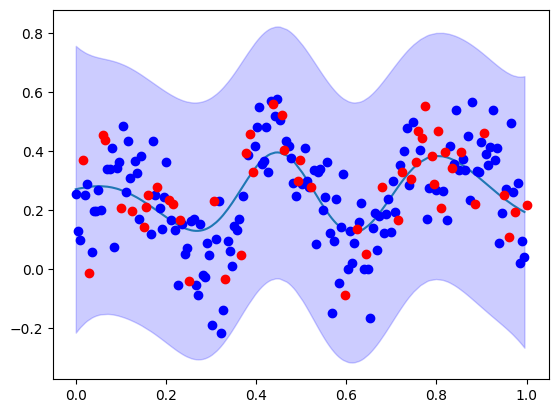

In [ ]:
order = torch.argsort(eval_x)

plt.plot(eval_x[order].detach().numpy(), pred_means[order].detach().numpy())
plt.fill_between(eval_x[order].detach().numpy(), 
                 pred_means[order].detach().numpy() + 2 * pred_std[order].detach().numpy(),
                 pred_means[order].detach().numpy() - 2 * pred_std[order].detach().numpy(),
                 color="b", alpha=0.2)

plt.plot(eval_x.detach().numpy(), eval_y.detach().numpy(), "bo")
plt.plot(x.detach().numpy(), y.detach().numpy(), "ro")

In [ ]:
np.savez("plots/data/gp_rq/big_noise_cmll_fit.npz",
# np.savez("plots/data/gp_rq/big_noise_mll_fit.npz",
        x_train=x.detach().numpy(),
        y_train=y.detach().numpy(),
        x_test=eval_x[order].detach().numpy(),
        y_test=eval_y[order].detach().numpy(),
        f_test=eval_f[order].detach().numpy(),
        pred_mu=pred_means[order].detach().numpy(),
        pred_sigma=pred_std[order].detach().numpy()
        )